In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
df2 = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

In [3]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df = pd.DataFrame()
df = pd.concat([df1,df2] , ignore_index=True)

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
2915,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
2916,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
2917,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


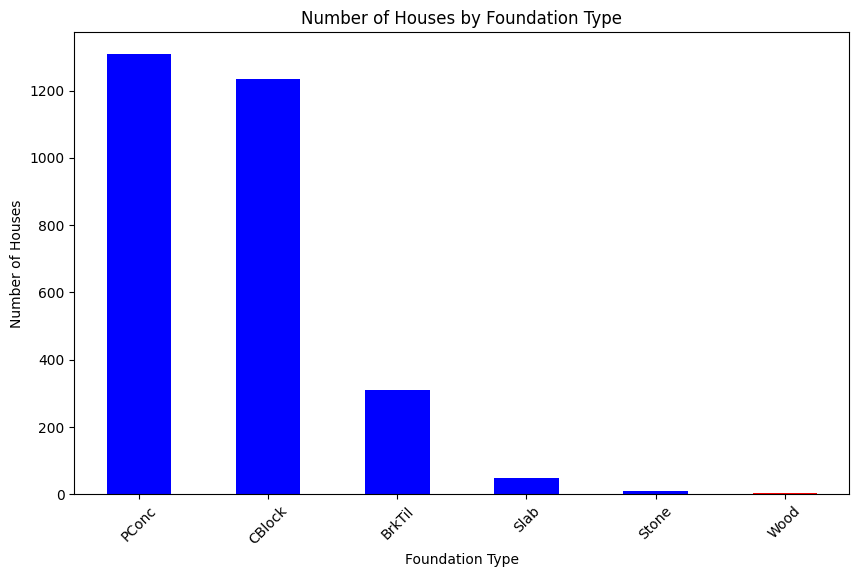

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' is already loaded with the data.

# Group the data by 'Foundation' and count the occurrences
foundation_counts = df['Foundation'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Sets the figure size
# Colors: Assign a different color for 'Wood' and a default color for others
colors = ['red' if foundation == 'Wood' else 'blue' for foundation in foundation_counts.index]
foundation_counts.plot(kind='bar' , color= colors)  # Creates a bar chart
plt.title('Number of Houses by Foundation Type')  # Adds a title to the chart
plt.xlabel('Foundation Type')  # Adds a label to the X-axis
plt.ylabel('Number of Houses')  # Adds a label to the Y-axis
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability
plt.show()  # Displays the chart


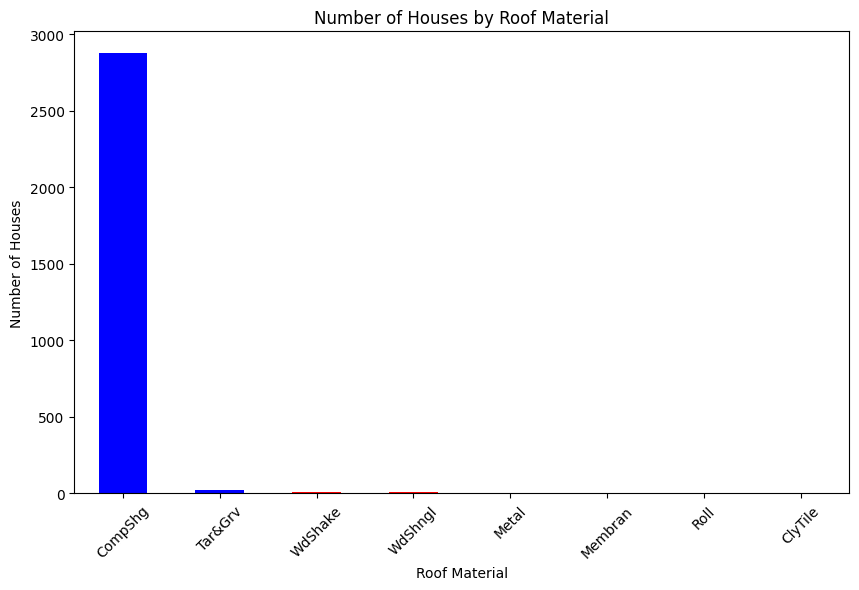

In [8]:
# Group the data by 'RoofMatl' and count the occurrences
roof_material_counts = df['RoofMatl'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Sets the figure size
colors = ['red' if roof_mat == 'WdShngl' or roof_mat == 'WdShake'  else 'blue' for roof_mat in roof_material_counts.index]
# Use a consistent color for simplicity, but you can customize this as needed
roof_material_counts.plot(kind='bar', color=colors)  # Creates a bar chart
plt.title('Number of Houses by Roof Material')  # Adds a title to the chart
plt.xlabel('Roof Material')  # Adds a label to the X-axis
plt.ylabel('Number of Houses')  # Adds a label to the Y-axis
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability
# Annotate each bar with its count

plt.show()  # Displays the chart

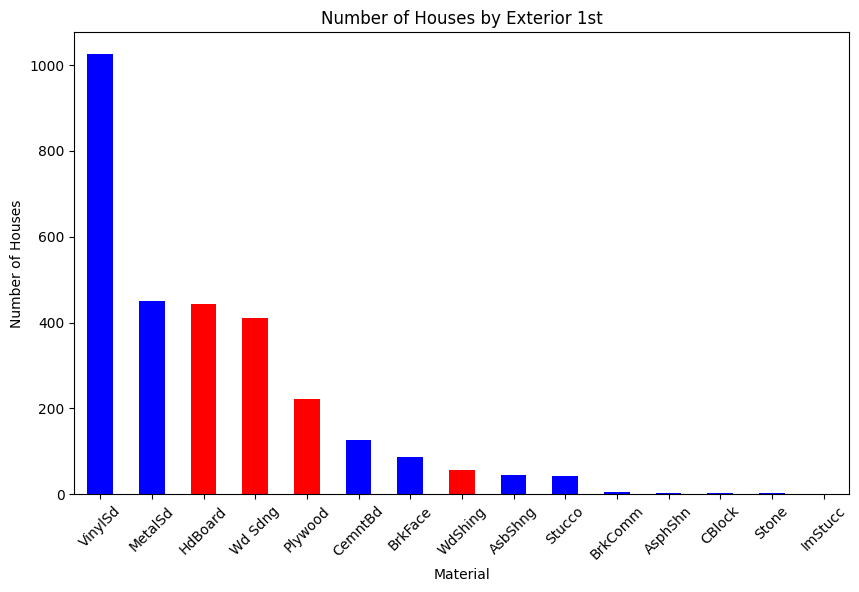

In [9]:
# Group the data by 'RoofMatl' and count the occurrences
ext1_material_counts = df['Exterior1st'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Sets the figure size
colors = ['red' if ext_mat == 'Wd Sdng' or ext_mat == 'WdShing' or ext_mat == 'Plywood' or ext_mat == 'HdBoard' else 'blue' for ext_mat in ext1_material_counts.index]
# Use a consistent color for simplicity, but you can customize this as needed
ext1_material_counts.plot(kind='bar', color=colors)  # Creates a bar chart
plt.title('Number of Houses by Exterior 1st')  # Adds a title to the chart
plt.xlabel('Material')  # Adds a label to the X-axis
plt.ylabel('Number of Houses')  # Adds a label to the Y-axis
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability
# Annotate each bar with its count

plt.show()  # Displays the chart

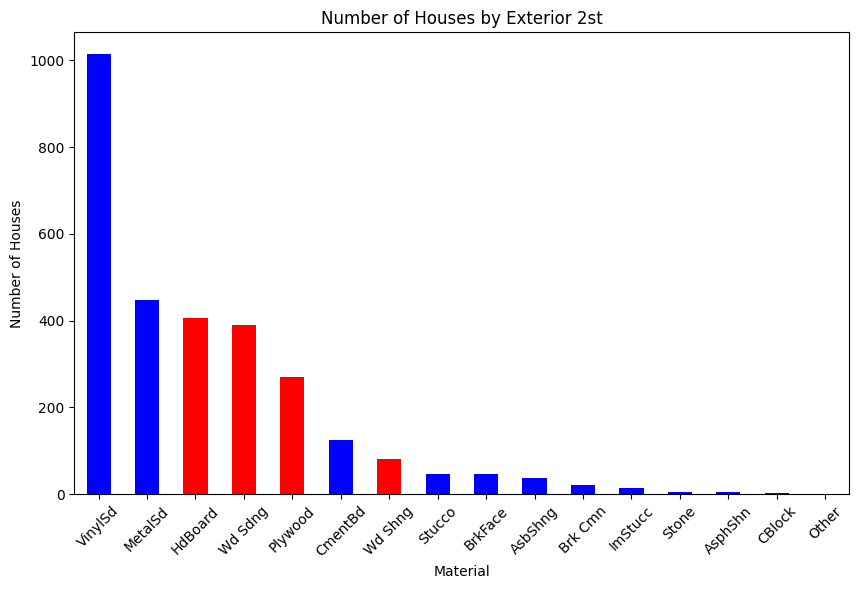

In [10]:
# Group the data by 'RoofMatl' and count the occurrences
ext2_material_counts = df['Exterior2nd'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Sets the figure size
colors = ['red' if ext_mat == 'Wd Sdng' or ext_mat == 'Wd Shng' or ext_mat == 'Plywood' or ext_mat == 'HdBoard'  else 'blue' for ext_mat in ext2_material_counts.index]
# Use a consistent color for simplicity, but you can customize this as needed
ext2_material_counts.plot(kind='bar', color=colors)  # Creates a bar chart
plt.title('Number of Houses by Exterior 2st')  # Adds a title to the chart
plt.xlabel('Material')  # Adds a label to the X-axis
plt.ylabel('Number of Houses')  # Adds a label to the Y-axis
plt.xticks(rotation=45)  # Rotates the X-axis labels for better readability
# Annotate each bar with its count

plt.show()  # Displays the chart

In [11]:
# List of values to search for
wood = ['Plywood', 'Wd Sdng', 'Wd Shng', 'HdBoard']

# Initialize the 'wood' column with 'No' (optional, depends on your requirement)
df['wood'] = 'No'

# Loop through all columns of the DataFrame
for col in df.columns:
    # Apply a function that checks if any of the values in 'wood' is present in the column
    # and updates the 'wood' column to 'Yes' if the condition is true
    for item in wood:
        # Using np.where to update the column based on the condition
        df['wood'] = np.where(df[col].astype(str).str.contains(item), 'Yes', df['wood'])


In [12]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

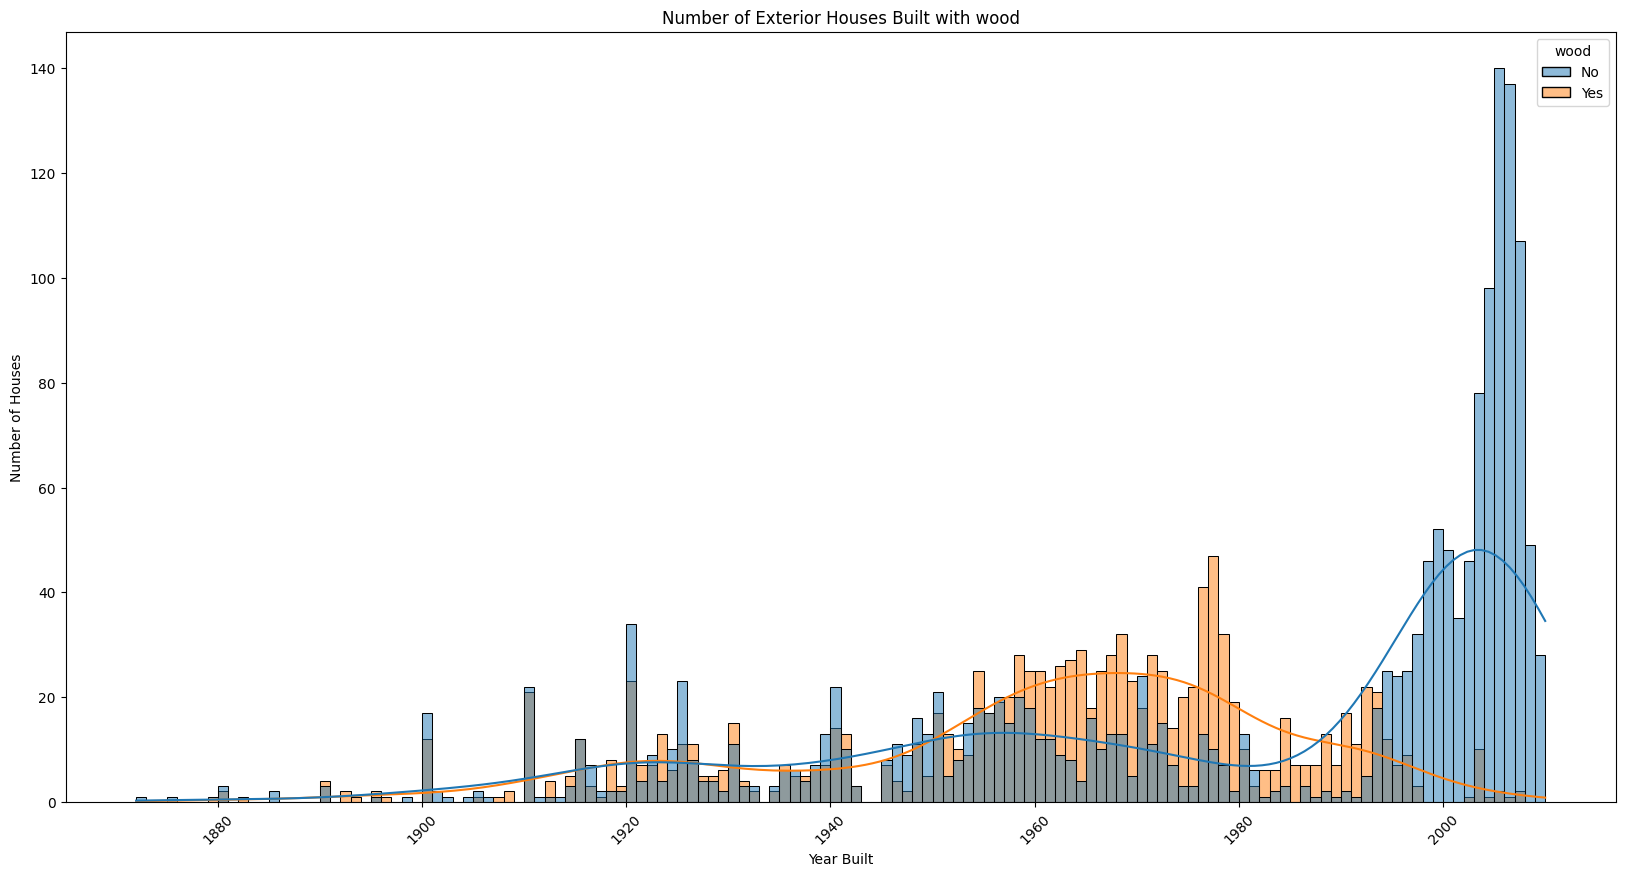

In [13]:
# Configurando o tamanho da figura
plt.figure(figsize=(20, 10))

# Criando um histograma para contar casas por ano de construção
sns.histplot(data=df, x="YearBuilt", bins=int(df['YearBuilt'].max() - df['YearBuilt'].min()), kde=True, hue="wood")

# Configurando títulos e rótulos
plt.title("Number of Exterior Houses Built with wood")
plt.xlabel("Year Built")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

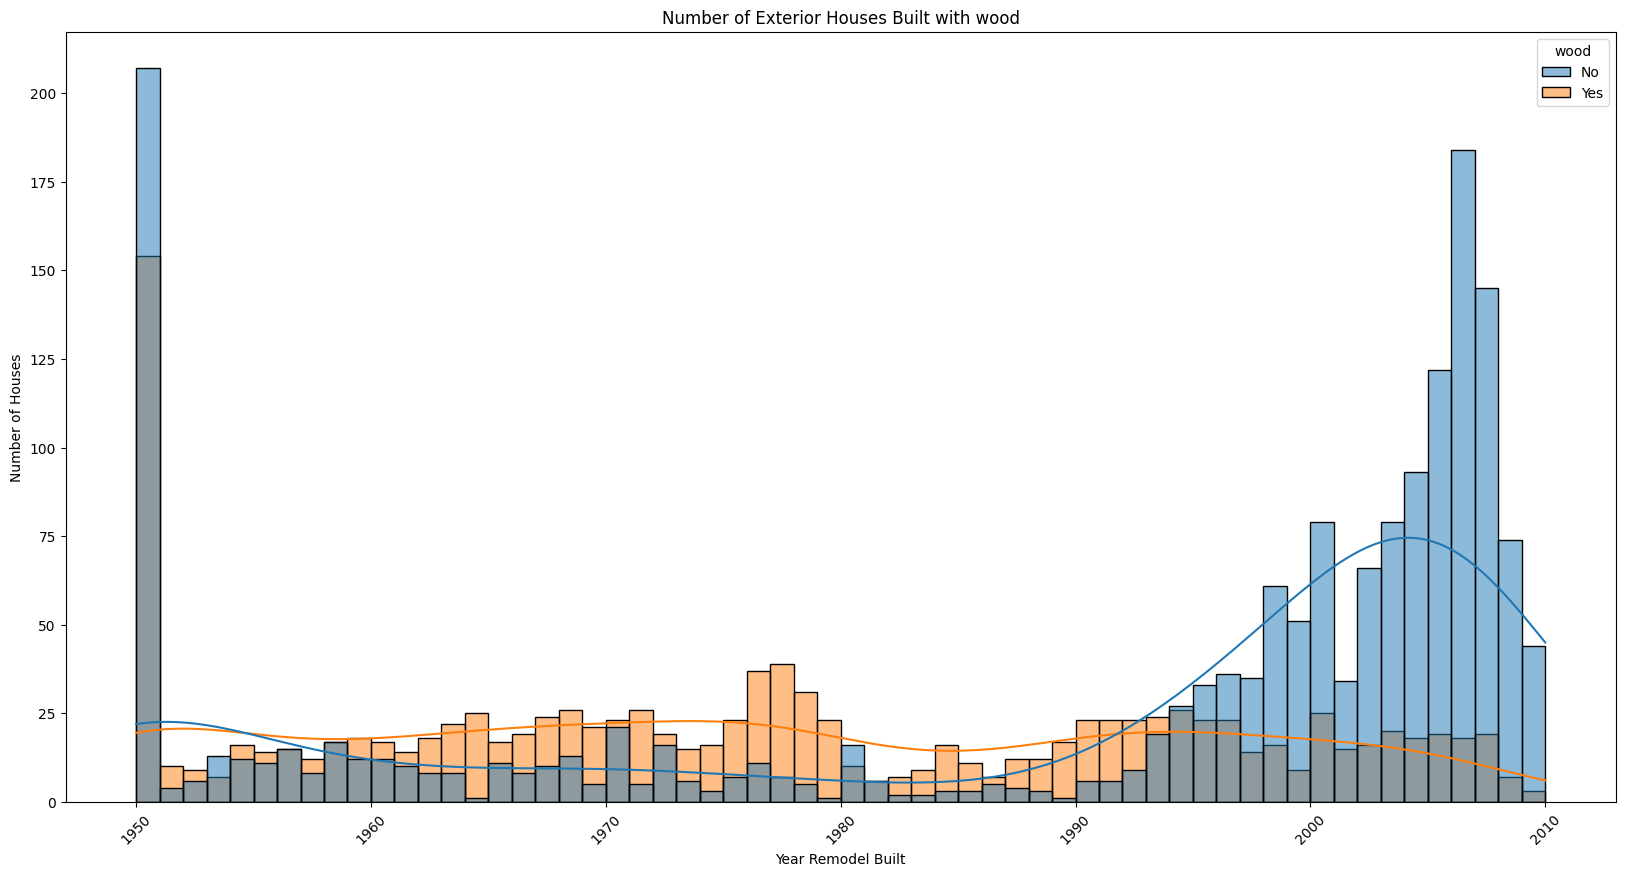

In [14]:
# Configurando o tamanho da figura
plt.figure(figsize=(20, 10))

# Criando um histograma para contar casas por ano de construção
sns.histplot(data=df, x="YearRemodAdd", bins=int(df['YearRemodAdd'].max() - df['YearRemodAdd'].min()), kde=True, hue="wood")

# Configurando títulos e rótulos
plt.title("Number of Exterior Houses Built with wood")
plt.xlabel("Year Remodel Built")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_17/338653192.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='SalePrice', hue='wood', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group i

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

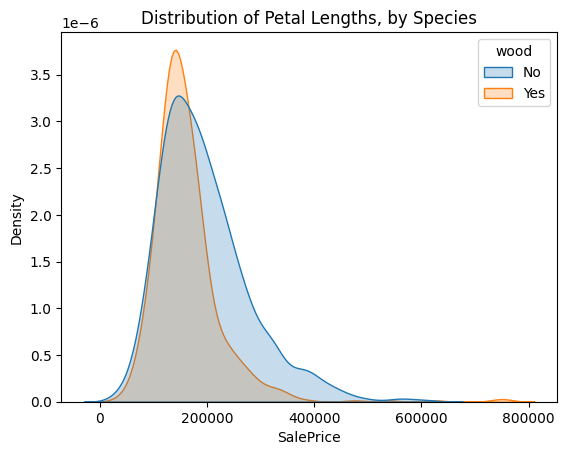

In [15]:
# KDE plots for each species
sns.kdeplot(data=df, x='SalePrice', hue='wood', shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

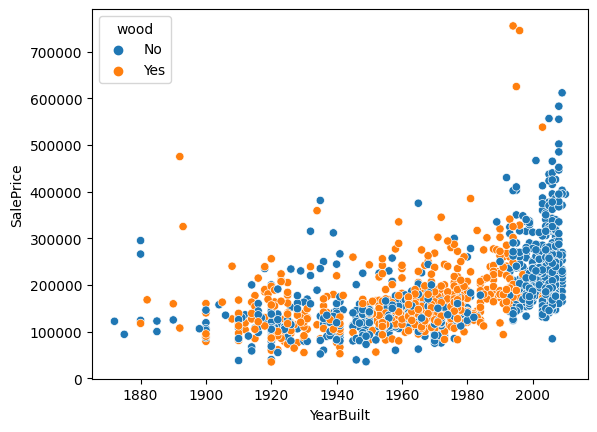

In [16]:
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'], hue=df['wood'])